# Multi-task Elastic Net Regression for HAR datasets 

In [1]:
from pandas import read_table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import MultiTaskElasticNet
filename = 'features.txt'
y_label='activity'
dataframe = read_table(filename, delim_whitespace=True,names=['id', 'feature_name'])
activity_map = {str(row.id):row.label_name for i, row in read_table('activity_labels.txt',delim_whitespace=True, names=['id', 'label_name']).iterrows()}
train_data_x = read_table('train/X_train.txt', delim_whitespace=True, names=dataframe.feature_name.tolist())
train_data_y = read_table('train/y_train.txt', delim_whitespace=True, names=[y_label])
train_data_y[y_label] = train_data_y[y_label].apply(lambda x: activity_map[str(x)])
train_data = pd.concat([train_data_y, train_data_x], axis=1)
test_data_x = read_table('test/X_test.txt', delim_whitespace=True, names=dataframe.feature_name.tolist())
test_data_y = read_table('test/y_test.txt', delim_whitespace=True, names=[y_label])
test_data_y[y_label] = test_data_y[y_label].apply(lambda x: activity_map[str(x)])
test_data= pd.concat([test_data_y,test_data_x], axis=1)
array=train_data.values
X=array[:,10:20]
Y=array[:,20:25]


/home/gautam/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


# For train datasets 

In [2]:
kfold = KFold(n_splits=10,random_state=7)
scoring='neg_mean_squared_error'
model=MultiTaskElasticNet()
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)

In [3]:
print(results)

[-0.16182354 -0.15754374 -0.17912406 -0.18082973 -0.16875504 -0.18884355
 -0.19470765 -0.15071574 -0.1396815  -0.15590406]


In [4]:
print(results.mean())

-0.16779286134084315


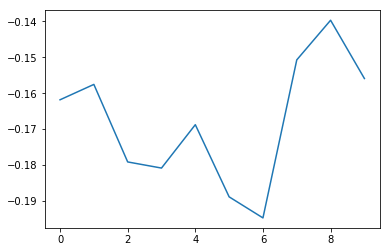

In [5]:
plt.plot(results)

# For test datasets 

In [6]:
array=test_data.values
X=array[:,10:20]
Y=array[:,20:25]
kfold = KFold(n_splits=10,random_state=7)
scoring='neg_mean_squared_error'
model=MultiTaskElasticNet()
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)

In [7]:
print(results)

[-0.15526807 -0.12643354 -0.13780031 -0.1703682  -0.11953203 -0.15048484
 -0.14721881 -0.14627656 -0.17967513 -0.12326422]


In [8]:
print(results.mean())

-0.14563217160067884


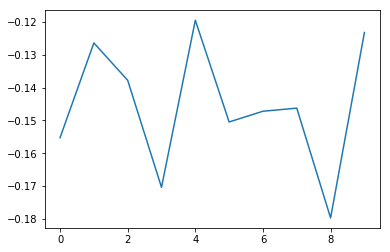

In [9]:
plt.plot(results)